<a href="https://colab.research.google.com/github/sivaharitha-s/customer_segmentation/blob/main/customer_segmentation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'Spending Score (1-100)')

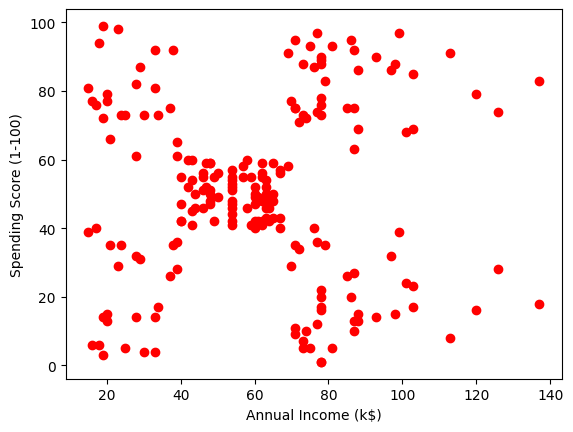

In [57]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [58]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]

to find the cluster k value

In [59]:

# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

In [60]:
print(wcss)

[269981.28000000014, 183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947, 33642.57922077922, 26686.837785187785, 24766.471609793436, 23103.122085983905]


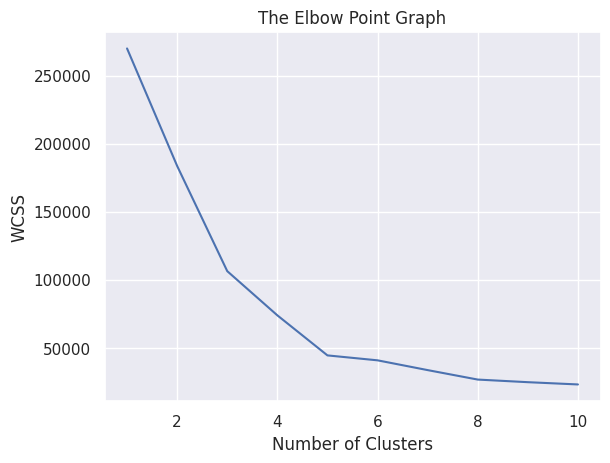

In [61]:
# plot an elbow graph
#here we choose elbow point as 5 because after that there is no significant drop so
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [66]:
df['cluster']=Y
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


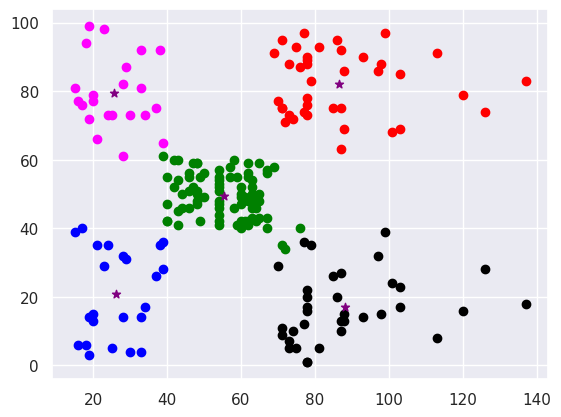

In [73]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='black')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='blue')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='magenta')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')


clusters based on 3 or more values

In [74]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [77]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [82]:
x=df[['Age','Annual Income (k$)','Spending Score (1-100)']]
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [94]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster_2'] = kmeans.fit_predict(x)
y= kmeans.fit_predict(x)


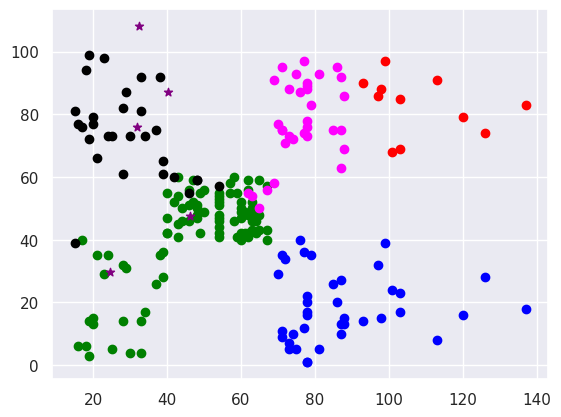

In [95]:
dff1 = df[df.cluster_2==0]
dff2 = df[df.cluster_2==1]
dff3 = df[df.cluster_2==2]
dff4 = df[df.cluster_2==3]
dff5 = df[df.cluster_2==4]
plt.scatter(dff1['Annual Income (k$)'],dff1['Spending Score (1-100)'],color='green')
plt.scatter(dff2['Annual Income (k$)'],dff2['Spending Score (1-100)'],color='red')
plt.scatter(dff3['Annual Income (k$)'],dff3['Spending Score (1-100)'],color='black')
plt.scatter(dff4['Annual Income (k$)'],dff4['Spending Score (1-100)'],color='blue')
plt.scatter(dff5['Annual Income (k$)'],dff5['Spending Score (1-100)'],color='magenta')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')